In [0]:
!pip install prophet

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
import pandas as pd
import numpy as np
from datetime import datetime
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
import pyspark.sql.functions as F
from datetime import datetime, timedelta


In [0]:
today = datetime.now() + timedelta(days=1)
today = today.strftime('%Y-%m-%d')
two_days_ago = (datetime.now() - timedelta(days=2)).strftime('%Y-%m-%d')

In [0]:
print(two_days_ago)

2024-10-22


13:54:06 - cmdstanpy - INFO - Chain [1] start processing
13:54:06 - cmdstanpy - INFO - Chain [1] done processing


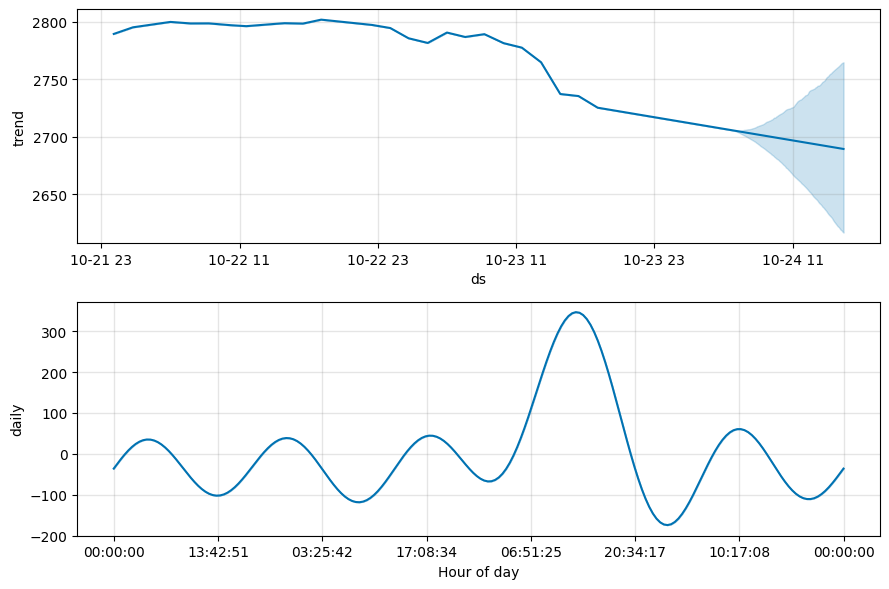

In [0]:
ticker = "GC=F"
minutes = 600
df = spark.sql("select * from forexcom_xauusd_3_months")
df = df.filter(f"time > '{two_days_ago}' and time < '{today}'").select("time", "open")
df = df.withColumn("open", F.col("open").cast("double"))\

bars = df.toPandas()
stock = pd.DataFrame(columns = ["time", "open"])
stock = bars
stock = stock.reset_index()
test_size = 100
data_train = stock.iloc[:-test_size, :]
data_test = stock.iloc[-test_size:, :]
df = data_train.reset_index()
df=df.rename(columns={'time':'ds', 'open':'y'})
df['ds'] = pd.to_datetime(df['ds'])
model = Prophet(weekly_seasonality=False)
model.add_seasonality(name='daily', period=60, fourier_order=5)
model.fit(df)


df_test = data_test.reset_index()
df_test=df_test.rename(columns={'time':'ds', 'open':'y'})
df_test['ds'] = pd.to_datetime(df_test['ds'])

future_open = model.make_future_dataframe(minutes, freq = 'min')

future_open['minute'] = future_open['ds'].dt.minute
future_open['day_of_week'] = future_open['ds'].dt.dayofweek
future_open = future_open[(future_open['minute']%5==0)]
future_open = future_open[future_open['day_of_week'] < 5]

forecast_open = model.predict(future_open)
fig = model.plot_components(forecast_open)

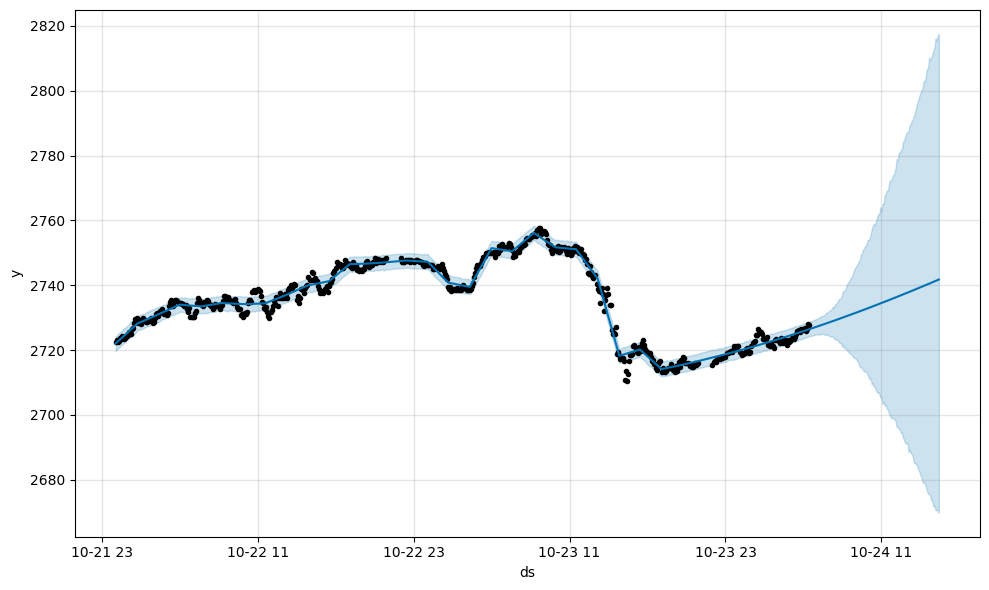

In [0]:
fig1 = model.plot(forecast_open)

In [0]:
# forecast_open

13:54:09 - cmdstanpy - INFO - Chain [1] start processing
13:54:09 - cmdstanpy - INFO - Chain [1] done processing


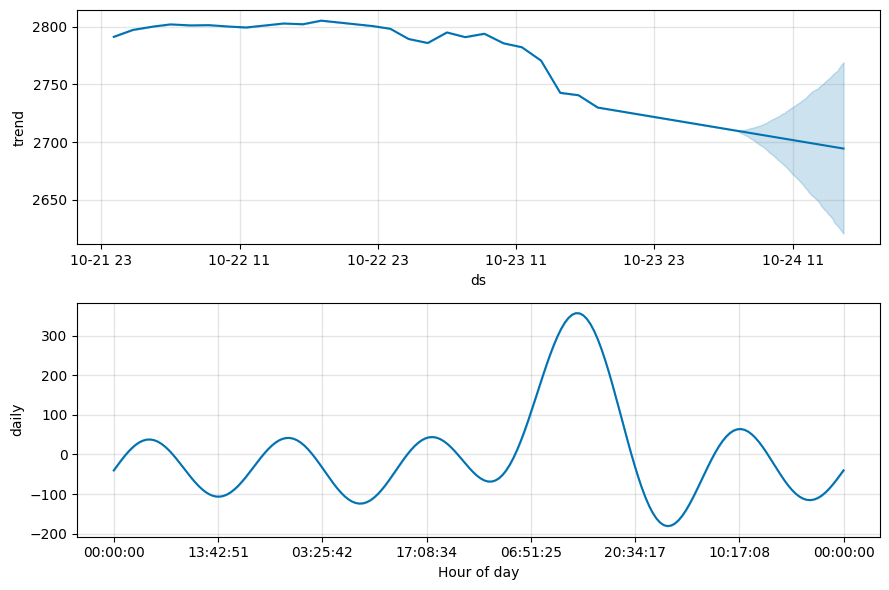

In [0]:
ticker = "GC=F"
minutes = 600
df = spark.sql("select * from forexcom_xauusd_3_months")
df = df.filter(f"time > '{two_days_ago}' and time < '{today}'").select("time", "high")
df = df.withColumn("high", F.col("high").cast("double"))\

bars = df.toPandas()
stock = pd.DataFrame(columns = ["time", "high"])
stock = bars
stock = stock.reset_index()
test_size = 100
data_train = stock.iloc[:-test_size, :]
data_test = stock.iloc[-test_size:, :]
df = data_train.reset_index()
df=df.rename(columns={'time':'ds', 'high':'y'})
df['ds'] = pd.to_datetime(df['ds'])
model = Prophet(weekly_seasonality=False)
model.add_seasonality(name='daily', period=60, fourier_order=5)
model.fit(df)


df_test = data_test.reset_index()
df_test=df_test.rename(columns={'time':'ds', 'high':'y'})
df_test['ds'] = pd.to_datetime(df_test['ds'])

future_high = model.make_future_dataframe(minutes, freq = 'min')

future_high['minute'] = future_high['ds'].dt.minute
future_high['day_of_week'] = future_high['ds'].dt.dayofweek
future_high = future_high[(future_high['minute']%5==0)]
future_high = future_high[future_high['day_of_week'] < 5]

forecast_high = model.predict(future_high)
fig = model.plot_components(forecast_high)

In [0]:
# forecast_high

13:54:11 - cmdstanpy - INFO - Chain [1] start processing
13:54:11 - cmdstanpy - INFO - Chain [1] done processing


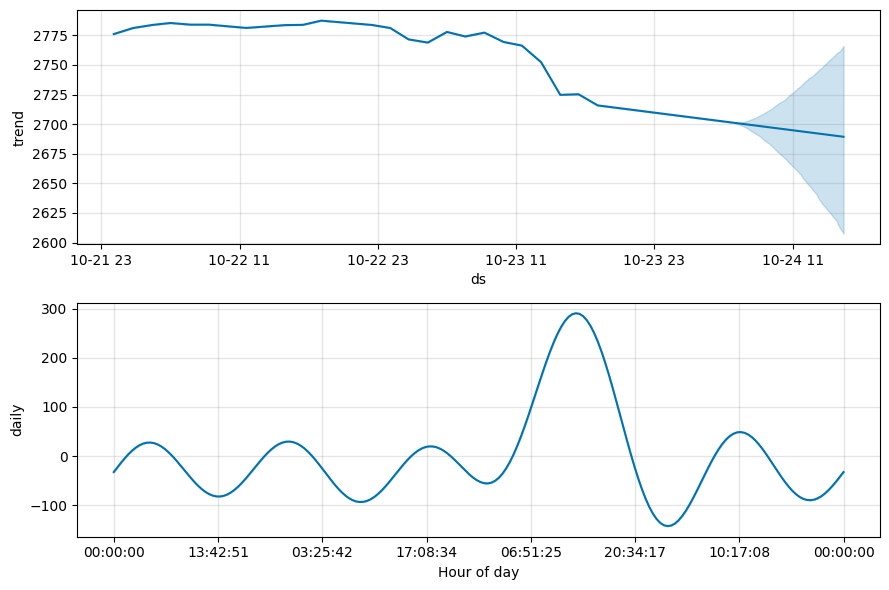

In [0]:
ticker = "GC=F"
minutes = 600
df = spark.sql("select * from forexcom_xauusd_3_months")
df = df.filter(f"time > '{two_days_ago}' and time < '{today}'").select("time", "low")
df = df.withColumn("low", F.col("low").cast("double"))\

bars = df.toPandas()
stock = pd.DataFrame(columns = ["time", "low"])
stock = bars
stock = stock.reset_index()
test_size = 100
data_train = stock.iloc[:-test_size, :]
data_test = stock.iloc[-test_size:, :]
df = data_train.reset_index()
df=df.rename(columns={'time':'ds', 'low':'y'})
df['ds'] = pd.to_datetime(df['ds'])
model = Prophet(weekly_seasonality=False)
model.add_seasonality(name='daily', period=60, fourier_order=5)
model.fit(df)


df_test = data_test.reset_index()
df_test=df_test.rename(columns={'time':'ds', 'low':'y'})
df_test['ds'] = pd.to_datetime(df_test['ds'])

future_low = model.make_future_dataframe(minutes, freq = 'min')

future_low['minute'] = future_low['ds'].dt.minute
future_low['day_of_week'] = future_low['ds'].dt.dayofweek
future_low['hour'] = future_low['ds'].dt.hour
future_low = future_low[(future_low['minute']%5==0)]
future_low = future_low[future_low['day_of_week'] < 5]

forecast_low = model.predict(future_low)
fig = model.plot_components(forecast_low)

In [0]:
# Rename 'yhat' columns to their respective labels in each dataframe
forecast_open = forecast_open.rename(columns={'yhat': 'open'})
forecast_high = forecast_high.rename(columns={'yhat': 'high'})
forecast_low = forecast_low.rename(columns={'yhat': 'low'})

# Merge the dataframes on the 'ds' column
merged_forecast = forecast_open[['ds', 'open']].merge(
    forecast_high[['ds', 'high']], on='ds').merge(
    forecast_low[['ds', 'low']], on='ds')

# Display the merged dataframe
merged_forecast.tail()

,ds,open,high,low
732,2024-10-24 15:05:00,2741.189238,2742.213254,2739.695070
733,2024-10-24 15:10:00,2741.331599,2742.359256,2739.826889
734,2024-10-24 15:15:00,2741.474189,2742.505508,2739.958884
735,2024-10-24 15:20:00,2741.617010,2742.652010,2740.091053
736,2024-10-24 15:25:00,2741.760059,2742.798762,2740.223396


13:54:14 - cmdstanpy - INFO - Chain [1] start processing
13:54:14 - cmdstanpy - INFO - Chain [1] done processing


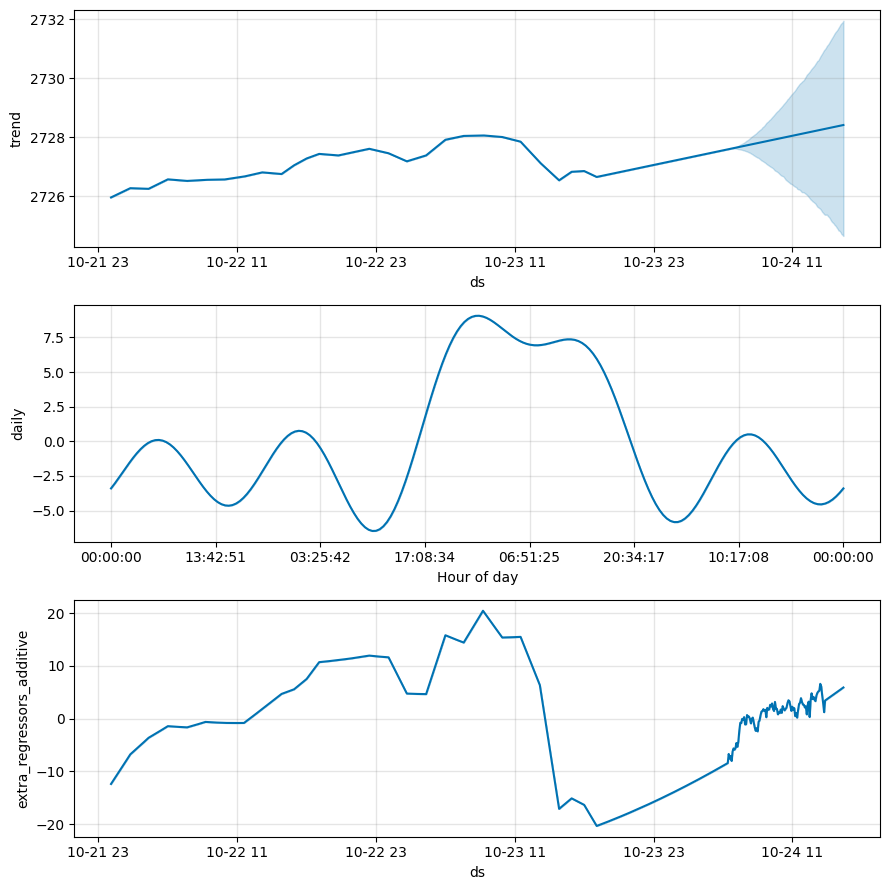

In [0]:
ticker = "GC=F"
minutes = 600
df = spark.sql("select * from forexcom_xauusd_3_months")
df = df.filter(f"time > '{two_days_ago}' and time < '{today}'").select("time", "open", "close", "high", "low")
df = df.withColumn("open", F.col("open").cast("double"))\
    .withColumn("close", F.col("close").cast("double"))\
    .withColumn("high", F.col("high").cast("double"))\
    .withColumn("low", F.col("low").cast("double"))
bars = df.toPandas()
stock = pd.DataFrame(columns = ["time", "open", "close", "high", "low"])
stock = bars
stock = stock.reset_index()
test_size = 100
data_train = stock.iloc[:-test_size, :]
data_test = stock.iloc[-test_size:, :]
df = data_train.reset_index()
df=df.rename(columns={'time':'ds', 'close':'y'})
df['ds'] = pd.to_datetime(df['ds'])
model = Prophet(weekly_seasonality=False)
model.add_seasonality(name='daily', period=60, fourier_order=5)
model.add_regressor('open')
model.add_regressor('high')
model.add_regressor('low')
model.fit(df)


df_test = data_test.reset_index()
df_test=df_test.rename(columns={'time':'ds', 'close':'y'})
df_test['ds'] = pd.to_datetime(df_test['ds'])

future = model.make_future_dataframe(minutes, freq = 'min')
future = future.merge(df_test[['ds', "open", "high", "low"]], on='ds', how='left')
future = future.merge(merged_forecast, on='ds', how='left', suffixes=('', '_merged'))

# Fill missing values (NaN) in 'future' with values from 'merged_forecast'
future['open'] =future['open'].combine_first(future['open_merged'])
future['high'] =future['high'].combine_first(future['high_merged'])
future['low'] = future['low'].combine_first(future['low_merged'])

# Drop the extra merged columns
future = future.drop(columns=['open_merged', 'high_merged', 'low_merged'])

future['minute'] = future['ds'].dt.minute
future['day_of_week'] = future['ds'].dt.dayofweek
future['hour'] = future['ds'].dt.hour
future = future[(future['minute']%5==0)]
future = future[future['day_of_week'] < 5]
future = future[future['hour'] != 16]
# future = future.dropna()

forecast = model.predict(future)
fig = model.plot_components(forecast)

In [0]:
display(df_test)
display(future)

level_0,index,ds,open,y,high,low
617,617,2024-10-24T05:30:00.000Z,2727.73,2728.3,2728.57,2727.54
618,618,2024-10-24T05:35:00.000Z,2728.3,2727.82,2728.52,2726.83
619,619,2024-10-24T05:40:00.000Z,2727.82,2727.79,2728.32,2727.38
620,620,2024-10-24T05:45:00.000Z,2727.79,2727.53,2727.79,2726.64
621,621,2024-10-24T05:50:00.000Z,2727.53,2728.0,2729.03,2727.51
622,622,2024-10-24T05:55:00.000Z,2728.0,2728.83,2729.69,2727.98
623,623,2024-10-24T06:00:00.000Z,2728.83,2729.0,2729.63,2728.35
624,624,2024-10-24T06:05:00.000Z,2729.0,2729.32,2730.26,2728.21
625,625,2024-10-24T06:10:00.000Z,2729.32,2730.71,2730.88,2729.12
626,626,2024-10-24T06:15:00.000Z,2730.71,2730.18,2730.81,2729.29


ds,open,high,low,minute,day_of_week,hour
2024-10-22T00:05:00.000Z,2722.0376686011878,2722.6890365556965,2721.7419241072407,5,1,0
2024-10-22T00:10:00.000Z,2722.3412538243465,2722.9968494003056,2722.0232521434314,10,1,0
2024-10-22T00:15:00.000Z,2722.6452016085123,2723.305026176642,2722.3048668078713,15,1,0
2024-10-22T00:20:00.000Z,2722.949512230333,2723.61356719707,2722.5867683067904,20,1,0
2024-10-22T00:25:00.000Z,2723.2541859653898,2723.9224727728874,2722.8689568455798,25,1,0
2024-10-22T00:30:00.000Z,2723.5592230883126,2724.231743214416,2723.151432628953,30,1,0
2024-10-22T00:35:00.000Z,2723.864623872925,2724.541378831235,2723.434195860936,35,1,0
2024-10-22T00:40:00.000Z,2724.1703885915376,2724.85137993135,2723.7172467443875,40,1,0
2024-10-22T00:45:00.000Z,2724.4765175157227,2725.1617468220693,2724.0005854815886,45,1,0
2024-10-22T00:50:00.000Z,2724.7830109159195,2725.4724798095667,2724.2842122739303,50,1,0


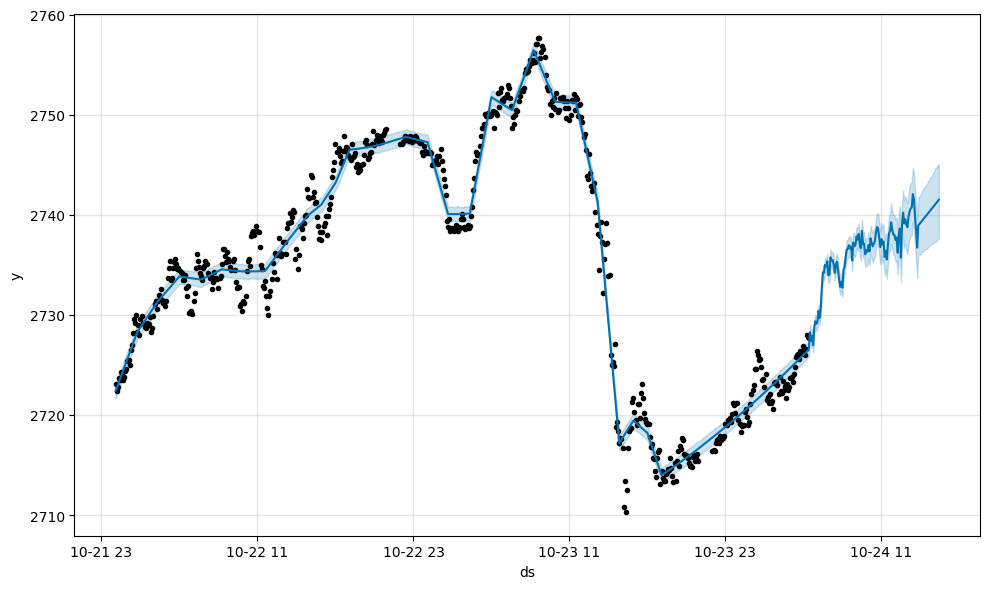

In [0]:
fig1 = model.plot(forecast)

In [0]:
# forecast

In [0]:
# Prepare for accuracy testing
forecast_test = forecast[['ds', 'yhat','yhat_upper','yhat_lower']].tail(test_size) 
forecast_test['y'] = data_test['close'].values 

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(forecast_test['y'], forecast_test['yhat'])
print(f'Mean Squared Error: {mse}')

# Calculate and print R-squared score
r2 = 1 - (mse / ((forecast_test['y'] - forecast_test['y'].mean()) ** 2).mean())
print(f'R-squared: {r2}')

# Print the forecasted and actual values
print(forecast_test[['ds', 'y', 'yhat']])

Mean Squared Error: 6.79824859351565
R-squared: 0.31760747773878284
                     ds        y         yhat
613 2024-10-24 07:10:00  2728.30  2735.435139
614 2024-10-24 07:15:00  2727.82  2735.483634
615 2024-10-24 07:20:00  2727.79  2734.997936
616 2024-10-24 07:25:00  2727.53  2734.190237
617 2024-10-24 07:30:00  2728.00  2735.078169
618 2024-10-24 07:35:00  2728.83  2735.301856
619 2024-10-24 07:40:00  2729.00  2734.406339
620 2024-10-24 07:45:00  2729.32  2733.433193
621 2024-10-24 07:50:00  2730.71  2732.805068
622 2024-10-24 07:55:00  2730.18  2733.322474
623 2024-10-24 08:00:00  2731.25  2732.709824
624 2024-10-24 08:05:00  2733.09  2734.507396
625 2024-10-24 08:10:00  2733.89  2734.809432
626 2024-10-24 08:15:00  2734.92  2735.758791
627 2024-10-24 08:20:00  2734.50  2736.504616
628 2024-10-24 08:25:00  2735.07  2736.589020
629 2024-10-24 08:30:00  2734.78  2736.956752
630 2024-10-24 08:35:00  2735.07  2736.630023
631 2024-10-24 08:40:00  2734.52  2736.845462
632 2024-10-

In [0]:
display(forecast_test[['ds', 'yhat', 'yhat_upper','yhat_lower','y']])

ds,yhat,yhat_upper,yhat_lower,y
2024-10-24T07:10:00.000Z,2735.435139317687,2736.233964580905,2734.6009205845094,2728.3
2024-10-24T07:15:00.000Z,2735.4836339060953,2736.266548245328,2734.645919363736,2727.82
2024-10-24T07:20:00.000Z,2734.997935511739,2735.7951796494085,2734.221134055855,2727.79
2024-10-24T07:25:00.000Z,2734.190236978676,2735.019779515679,2733.409911995545,2727.53
2024-10-24T07:30:00.000Z,2735.0781686267796,2735.87285054541,2734.287490336077,2728.0
2024-10-24T07:35:00.000Z,2735.301856159323,2736.090509168613,2734.45560470599,2728.83
2024-10-24T07:40:00.000Z,2734.4063390137494,2735.2500045703637,2733.55278485657,2729.0
2024-10-24T07:45:00.000Z,2733.4331930798403,2734.2647704669544,2732.575913856834,2729.32
2024-10-24T07:50:00.000Z,2732.805067508859,2733.638930017265,2731.985150067219,2730.71
2024-10-24T07:55:00.000Z,2733.322474419202,2734.201956582246,2732.462421990466,2730.18


In [0]:
import pytz

# Convert the 'ds' column to datetime (this will retain the timezone information)
forecast_test['ds'] = pd.to_datetime(forecast_test['ds'])
forecast_test['ds'] = forecast_test['ds'].dt.tz_localize('UTC')
# Define the Chicago timezone
chicago_tz = pytz.timezone('America/Chicago')

# Apply timezone conversion from UTC to Chicago
forecast_test['ds'] = forecast_test['ds'].apply(lambda x: x.astimezone(chicago_tz))


In [0]:
pd.set_option('display.max_rows', 10000)

In [0]:
print(forecast_test)

                           ds         yhat   yhat_upper   yhat_lower        y
613 2024-10-24 02:10:00-05:00  2735.435139  2736.233965  2734.600921  2728.30
614 2024-10-24 02:15:00-05:00  2735.483634  2736.266548  2734.645919  2727.82
615 2024-10-24 02:20:00-05:00  2734.997936  2735.795180  2734.221134  2727.79
616 2024-10-24 02:25:00-05:00  2734.190237  2735.019780  2733.409912  2727.53
617 2024-10-24 02:30:00-05:00  2735.078169  2735.872851  2734.287490  2728.00
618 2024-10-24 02:35:00-05:00  2735.301856  2736.090509  2734.455605  2728.83
619 2024-10-24 02:40:00-05:00  2734.406339  2735.250005  2733.552785  2729.00
620 2024-10-24 02:45:00-05:00  2733.433193  2734.264770  2732.575914  2729.32
621 2024-10-24 02:50:00-05:00  2732.805068  2733.638930  2731.985150  2730.71
622 2024-10-24 02:55:00-05:00  2733.322474  2734.201957  2732.462422  2730.18
623 2024-10-24 03:00:00-05:00  2732.709824  2733.590057  2731.751082  2731.25
624 2024-10-24 03:05:00-05:00  2734.507396  2735.291276  2733.54